In [1]:
import warnings
warnings.filterwarnings('ignore')
from dropout_bayesian import dataset, Current
# 데이터 불러오기
df = dataset(label = '역률평균', freq = '30min')
# current 클래스 생성
current = Current(df)

In [2]:
# index는 시간 단위 timestamp
# 역률평균, R S T 상역률로 역률평균을 예측
df.describe()

,역률평균,R상역률,S상역률,T상역률,LABEL_NAME
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.0
mean,0.949094,0.943735,0.948003,0.949587,0.0
std,0.006327,0.006687,0.006396,0.007583,0.0
min,0.925978,0.917448,0.925260,0.921615,0.0
25%,0.945010,0.939844,0.944532,0.944532,0.0
50%,0.949561,0.943229,0.946875,0.952474,0.0
75%,0.952331,0.947298,0.951074,0.955078,0.0
max,0.965136,0.960938,0.964844,0.963542,0.0


Epoch 1/150
4/4 [==============================] - 18s 718ms/step - loss: 2.9892 - val_loss: 1.4171
Epoch 2/150
4/4 [==============================] - 1s 364ms/step - loss: 1.2296 - val_loss: 0.9410
Epoch 3/150
4/4 [==============================] - 1s 340ms/step - loss: 0.8729 - val_loss: 0.9128
Epoch 4/150
4/4 [==============================] - 1s 339ms/step - loss: 0.8196 - val_loss: 0.6808
Epoch 5/150
4/4 [==============================] - 1s 326ms/step - loss: 0.6504 - val_loss: 0.5597
Epoch 6/150
4/4 [==============================] - 1s 348ms/step - loss: 0.5527 - val_loss: 0.5089
Epoch 7/150
4/4 [==============================] - 2s 511ms/step - loss: 0.4384 - val_loss: 0.3346
Epoch 8/150
4/4 [==============================] - 2s 513ms/step - loss: 0.3743 - val_loss: 0.3715
Epoch 9/150
4/4 [==============================] - 2s 432ms/step - loss: 0.3262 - val_loss: 0.2121
Epoch 10/150
4/4 [==============================] - 2s 402ms/step - loss: 0.2342 - val_loss: 0.1372
Epoch 11

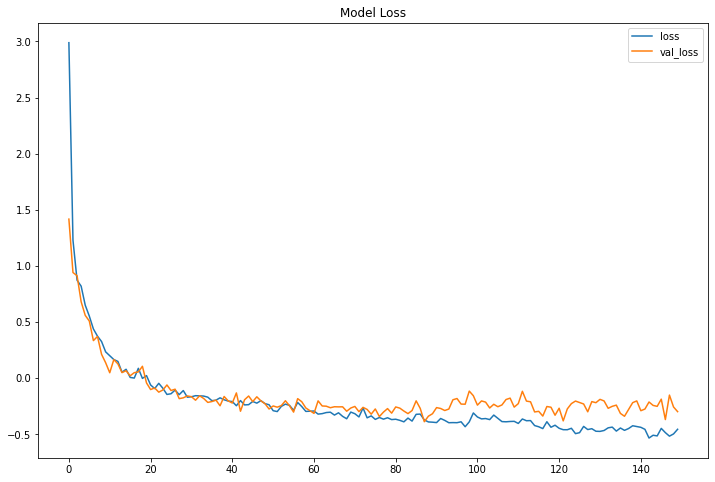

100%|██████████| 30/30 [00:27<00:00,  1.09it/s]


rmse: 0.45207181572914124
r2: 0.754148225254986
For Uncertainty model, 0.7694524495677233 are in 99% confidence interval


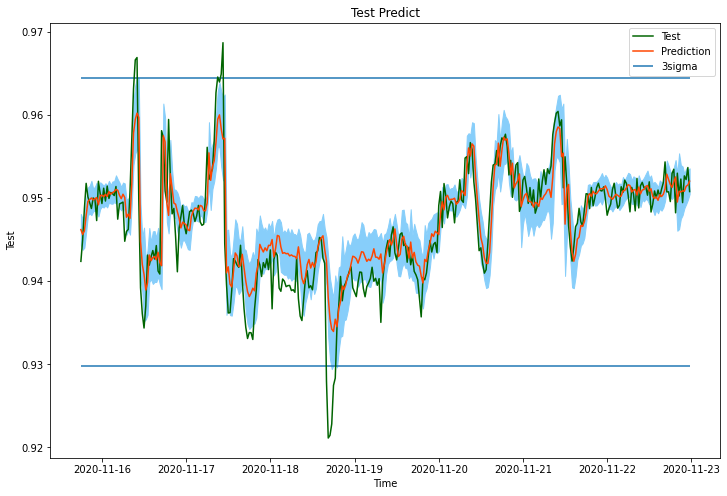

In [2]:
# Transformer LSTM 모델로 예측
# - 양방향 LSTM 2개와 FF layer 쌓은 트랜스포머 구조
# - key_dim : multihead attention 입력 차원
# - num_head : 병렬을 얼마나 할 것인지
# - ff_dim : FF 신경망 units
# - num_blocks : 트랜스포머 블록 층 (2개 이상이면 loss 크게 증가해서 1개로 한다)
model = current.Transfomer_LSTM(key_dim = 128, num_heads=2, ff_dim=128, num_blocks=1)

# 150번 반복, Adam optimizer
model = current.fit(model=model, epochs = 150, batch_size = 256, show_loss = True)

# Monte Carlo 샘플링 20번, 99% 신뢰구간 추정
TransformerLSTM_predict = current.predict_ci(model=model, n_sample = 30, ci=2.58, show= True)

In [3]:
TransformerLSTM_predict.to_csv('result.csv')

In [4]:
TransformerLSTM_predict

,역률평균,R상역률,S상역률,T상역률,LABEL_NAME,predict,predict_low,predict_up,sigma_upper,sigma_lower
TIMESTAMP,,,,,,,,,,
2020-11-15 18:00:00,0.943477,0.937240,0.939844,0.947657,0.0,0.946210,0.944336,0.948084,0.964435,0.929739
2020-11-15 18:30:00,0.945605,0.938672,0.942578,0.949479,0.0,0.945619,0.943772,0.947466,0.964435,0.929739
2020-11-15 19:00:00,0.948692,0.941927,0.945703,0.952604,0.0,0.946045,0.944041,0.948049,0.964435,0.929739
2020-11-15 19:30:00,0.951203,0.944271,0.947526,0.955339,0.0,0.947911,0.945923,0.949900,0.964435,0.929739
2020-11-15 20:00:00,0.949868,0.942969,0.947135,0.953776,0.0,0.949603,0.947930,0.951275,0.964435,0.929739
...,...,...,...,...,...,...,...,...,...,...
2020-11-22 21:30:00,0.949296,0.943360,0.945964,0.952865,0.0,0.950879,0.947946,0.953812,0.964435,0.929739
2020-11-22 22:00:00,0.951944,0.945833,0.948438,0.955339,0.0,0.950830,0.948774,0.952887,0.964435,0.929739
2020-11-22 22:30:00,0.951579,0.945052,0.947526,0.955339,0.0,0.951423,0.949263,0.953582,0.964435,0.929739


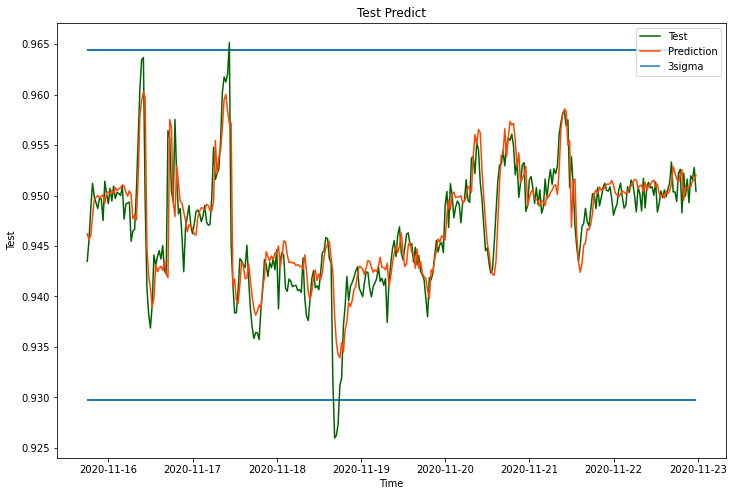

In [5]:
import matplotlib.pyplot as plt
tx = TransformerLSTM_predict.index
plt.figure(figsize=(12,8))
plt.plot(tx, TransformerLSTM_predict['역률평균'],'darkgreen')
plt.plot(tx, TransformerLSTM_predict['predict'], 'orangered')
plt.hlines(TransformerLSTM_predict['sigma_upper'], tx[0], tx[-1])
plt.hlines(TransformerLSTM_predict['sigma_lower'], tx[0], tx[-1])

plt.xlabel('Time')
plt.ylabel('Test')
plt.legend(['Test','Prediction','3sigma'],loc='upper right')
plt.title('Test Predict')
plt.show() 

In [7]:
# 수평선은 데이터의 3시그마 값
# 푸른 범위가 모델의 추정된 99% 신뢰구간 

Epoch 1/150
4/4 [==============================] - 2s 183ms/step - loss: 1.5213 - val_loss: 1.6558
Epoch 2/150
4/4 [==============================] - 0s 38ms/step - loss: 1.2025 - val_loss: 0.9241
Epoch 3/150
4/4 [==============================] - 0s 35ms/step - loss: 0.8988 - val_loss: 0.8538
Epoch 4/150
4/4 [==============================] - 0s 35ms/step - loss: 0.7365 - val_loss: 0.7928
Epoch 5/150
4/4 [==============================] - 0s 35ms/step - loss: 0.6218 - val_loss: 0.6027
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.5524 - val_loss: 0.5087
Epoch 7/150
4/4 [==============================] - 0s 34ms/step - loss: 0.4858 - val_loss: 0.4921
Epoch 8/150
4/4 [==============================] - 0s 34ms/step - loss: 0.4258 - val_loss: 0.3749
Epoch 9/150
4/4 [==============================] - 0s 34ms/step - loss: 0.3499 - val_loss: 0.3327
Epoch 10/150
4/4 [==============================] - 0s 35ms/step - loss: 0.2783 - val_loss: 0.2702
Epoch 11/150
4/4 [

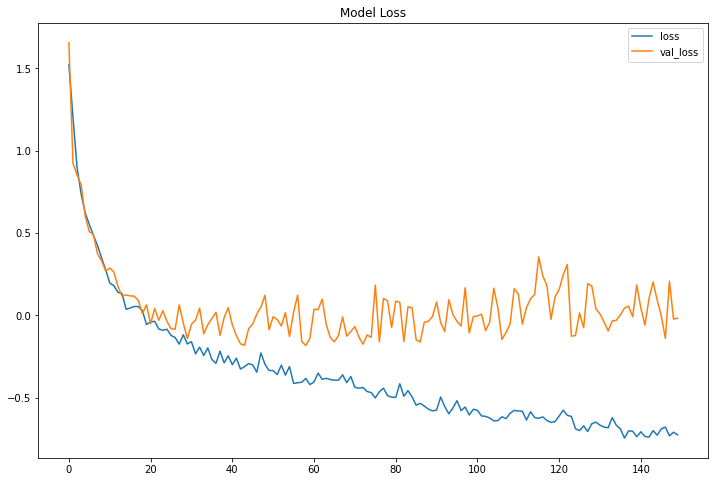

100%|██████████| 30/30 [00:03<00:00,  8.73it/s]


rmse: 0.6417461037635803
r2: 0.5045668975602362
For Uncertainty model, 0.5244956772334294 are in 99% confidence interval


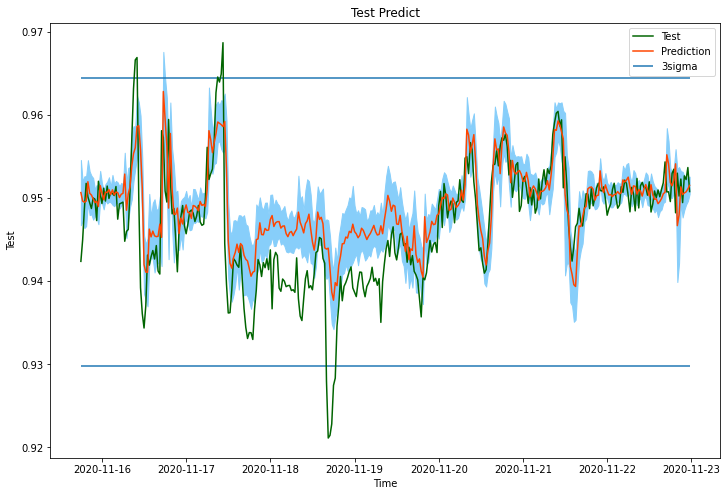

In [8]:
# LSTM 모델
model2 = current.Transfomer_Conv(key_dim = 128, num_heads=2, ff_dim=128, num_blocks=1)
model2 = current.fit(model=model2, epochs = 150, batch_size = 256, show_loss = True)
Conv_predict = current.predict_ci(model=model2, n_sample = 30, ci=2.58, show= True)

Epoch 1/150
4/4 [==============================] - 4s 348ms/step - loss: 0.4126 - val_loss: 0.4260
Epoch 2/150
4/4 [==============================] - 1s 211ms/step - loss: 0.3412 - val_loss: 0.3064
Epoch 3/150
4/4 [==============================] - 1s 205ms/step - loss: 0.2804 - val_loss: 0.2796
Epoch 4/150
4/4 [==============================] - 1s 192ms/step - loss: 0.2326 - val_loss: 0.1948
Epoch 5/150
4/4 [==============================] - 1s 158ms/step - loss: 0.1494 - val_loss: 0.0159
Epoch 6/150
4/4 [==============================] - 1s 167ms/step - loss: 0.1047 - val_loss: 0.1603
Epoch 7/150
4/4 [==============================] - 1s 202ms/step - loss: 0.0683 - val_loss: -0.0632
Epoch 8/150
4/4 [==============================] - 1s 182ms/step - loss: 0.0496 - val_loss: 0.0217
Epoch 9/150
4/4 [==============================] - 1s 173ms/step - loss: 0.0223 - val_loss: -0.0227
Epoch 10/150
4/4 [==============================] - 1s 202ms/step - loss: 0.0041 - val_loss: -0.0812
Epoch 

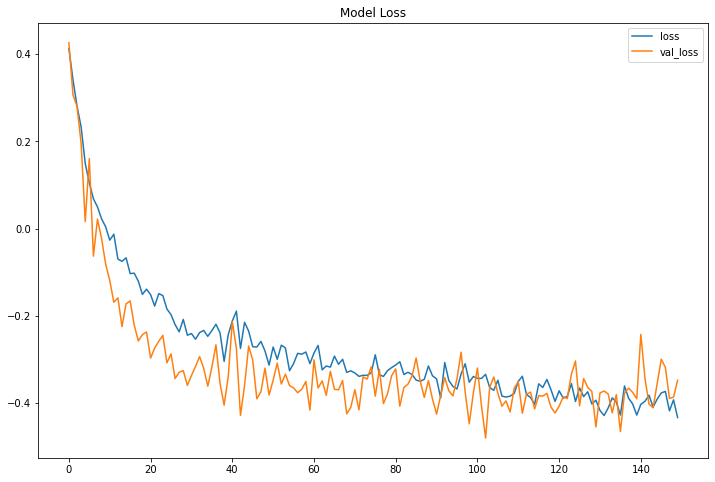

100%|██████████| 30/30 [00:13<00:00,  2.15it/s]


rmse: 0.49007147550582886
r2: 0.7110801503758584
For Uncertainty model, 0.8011527377521613 are in 99% confidence interval


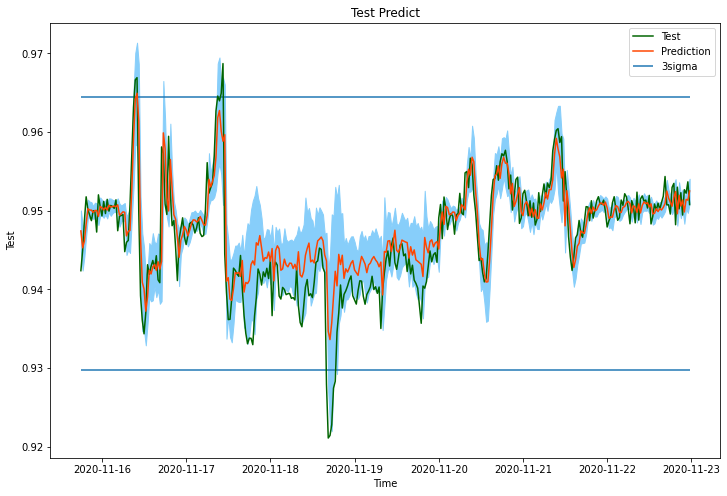

In [9]:
# LSTM 모델
model3 = current.LSTM()
model3 = current.fit(model=model3, epochs = 150, batch_size = 256, show_loss = True)
LSTM_predict = current.predict_ci(model=model3, n_sample = 30, ci=2.58, show= True)